In [5]:
import random

import cv2
from matplotlib import pyplot as plt

import gorillatracker.utils.cvat_import as cvat_import
import gorillatracker.utils.visualizer_helpers as vh

In [6]:
base_path = "/workspaces/gorillatracker/data/ground_truth/cxl"
cvat_path = f"{base_path}/full_images_body_instance_segmentation/cvat_export.xml"
img_path = f"{base_path}/full_images/"
segmented_gorilla_images = cvat_import.cvat_import(cvat_path, img_path)

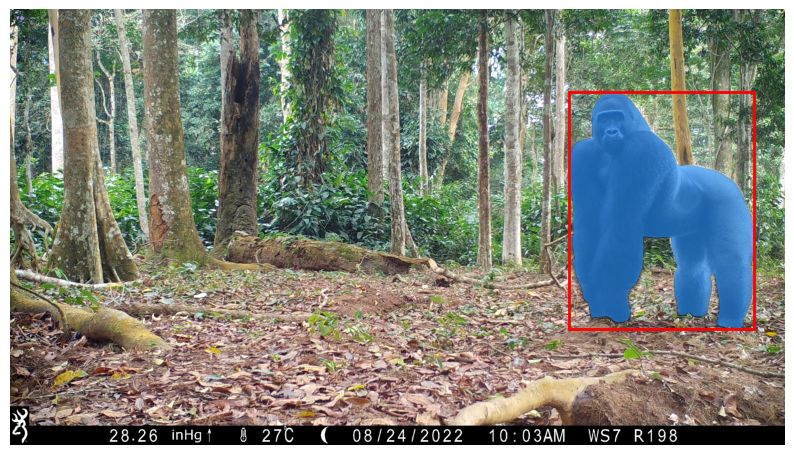

In [7]:
segmented_gorilla_image = random.choice(segmented_gorilla_images)

gorilla_image = cv2.imread(segmented_gorilla_image.path)
gorilla_image = cv2.cvtColor(gorilla_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(gorilla_image)
plt.axis("off")
for class_label, segments in segmented_gorilla_image.segments.items():
    for mask, box in segments:
        vh.show_sam_box(box, plt.gca())
        vh.show_sam_mask(mask, plt.gca())
plt.show()

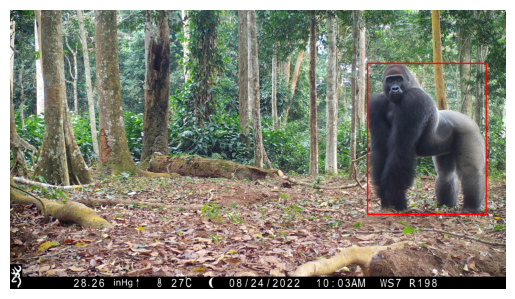

In [8]:
filename = segmented_gorilla_image.path.split("/")[-1].split(".")[0]
bbox_path = f"{base_path}/full_images_body_bbox/{filename}.txt"
vh.show_yolo_box(segmented_gorilla_image.path, bbox_path)